# Zomato Data Analysis

<img src="zomato.jfif" width="500" height="500" />

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [142]:
country_df = pd.read_excel("Country-Code.xlsx")

country_df

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [143]:
zomato_df =pd.read_csv("zomato.csv", encoding='ISO-8859-1')

zomato_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [144]:
# Merging both the datas
df = pd.merge(zomato_df, country_df, on='Country Code', how='inner')

df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


# Exploratory Data Analysis(EDA)

In [145]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [146]:
df.shape

(9551, 22)

In [147]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [148]:
df.isin([' ?','','-']).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [149]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<Axes: >

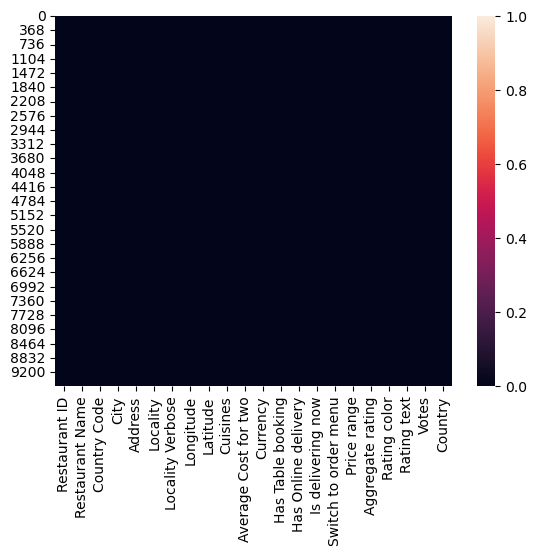

In [151]:
#Visulizing above data with Heatmap
sns.heatmap(df.isnull())

In [152]:
df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [153]:
 df.duplicated().sum()

0

In [154]:
# Finding rows which have missing data of cuisines

df[df['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,No,1,3.9,Yellow,Good,160,United States
288,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,No,3,3.9,Yellow,Good,209,United States
312,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,No,3,3.8,Yellow,Good,102,United States
328,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,No,1,3.4,Orange,Average,11,United States
349,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,No,3,4.4,Green,Very Good,1158,United States
395,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
432,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,No,1,3.9,Yellow,Good,309,United States


In [155]:
# Fill missing values in 'Cuisines' with the mode

df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [156]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

<Axes: >

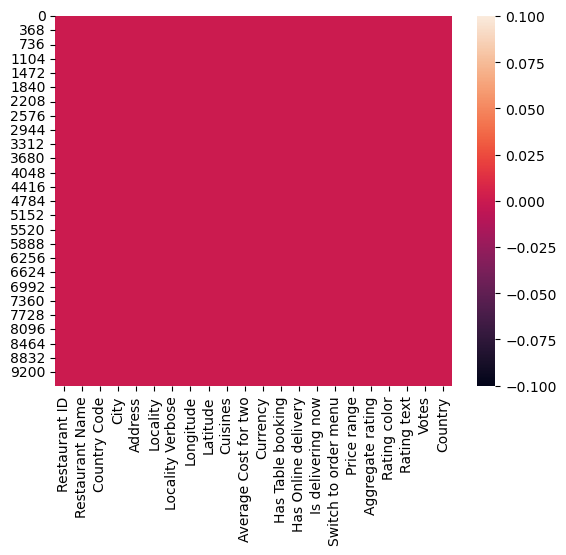

In [157]:
#Visulizing heatmap after handling missing data in cuisines

sns.heatmap(df.isnull())

# Description

In [158]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [159]:
df.describe(include=object).T

,count,unique,top,freq
Restaurant Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Sector 41, Noida",11
Locality,9551,1208,Connaught Place,122
Locality Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9551,1825,North Indian,945
Currency,9551,12,Indian Rupees(Rs.),8652
Has Table booking,9551,2,No,8393
Has Online delivery,9551,2,No,7100
Is delivering now,9551,2,No,9517


# Data Visualisation

# 1.Distribution of restaurants by country

           Country  Number of Restaurants
0            India                   8652
1    United States                    434
2   United Kingdom                     80
3           Brazil                     60
4              UAE                     60
5     South Africa                     60
6      New Zealand                     40
7           Turkey                     34
8        Australia                     24
9      Phillipines                     22
10       Indonesia                     21
11       Singapore                     20
12           Qatar                     20
13       Sri Lanka                     20
14          Canada                      4


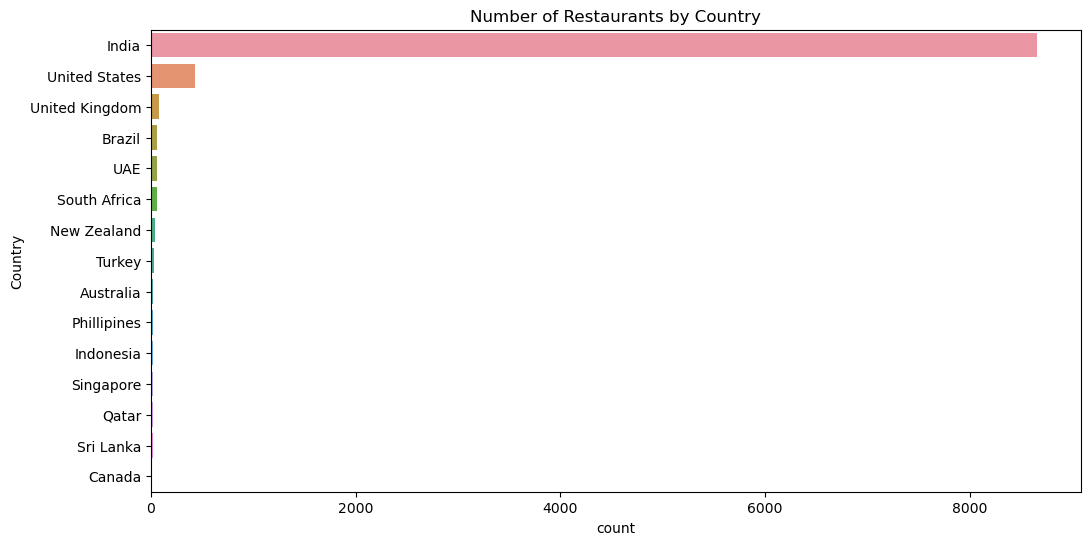

In [160]:
# Count the number of restaurants in each country
restaurant_counts = df['Country'].value_counts().reset_index()
restaurant_counts.columns = ['Country', 'Number of Restaurants']

# Display 
print(restaurant_counts)

#Plot
plt.figure(figsize=(12,6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Restaurants by Country')
plt.show()

In [161]:
#lets Find the no. of top rated restaurants in each country

# Setting a rating threshold
rating_threshold = 4.0

# to count the no. of top rated restro
top_rated_counts = df[df['Aggregate rating'] >= rating_threshold].groupby('Country').size().reset_index(name='Top Rated Restaurants')

# Sorting the results in descending order
top_rated_counts = top_rated_counts.sort_values(by='Top Rated Restaurants', ascending=False)
top_rated_counts.reset_index(drop=True, inplace=True)
top_rated_counts


,Country,Top Rated Restaurants
0,India,808
1,United States,247
2,United Kingdom,54
3,UAE,49
4,South Africa,47
5,New Zealand,37
6,Brazil,36
7,Turkey,30
8,Phillipines,21
9,Indonesia,17


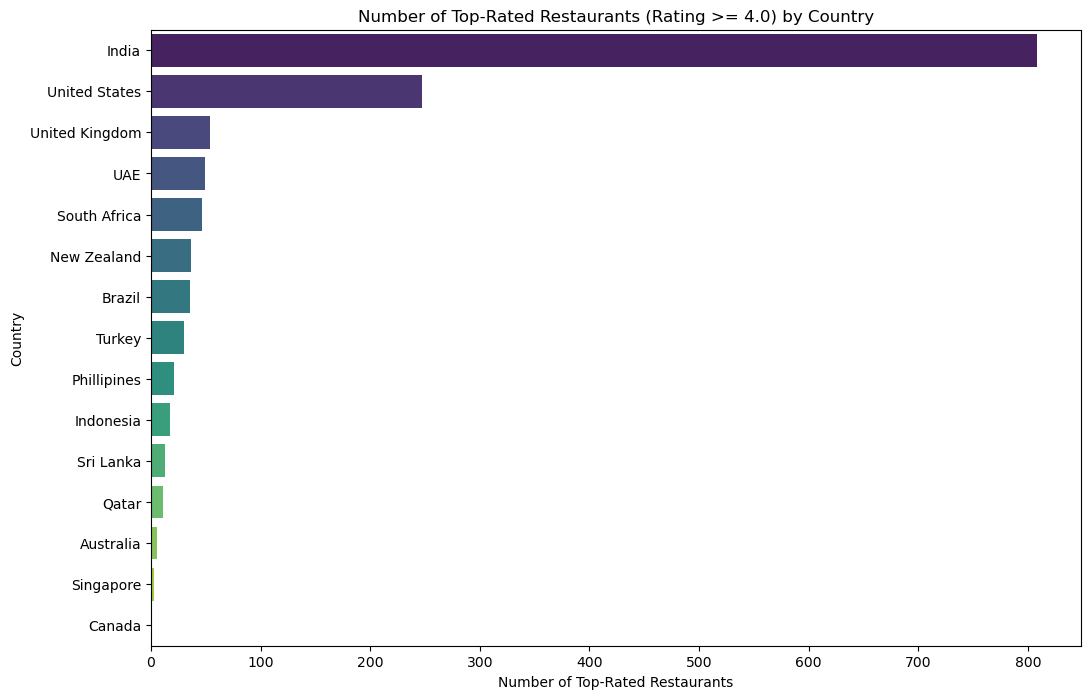

In [162]:
# Plotting the number of top-rated restaurants in each country

plt.figure(figsize=(12, 8))

sns.barplot(x='Top Rated Restaurants', y='Country', data=top_rated_counts, palette='viridis')
plt.title('Number of Top-Rated Restaurants (Rating >= 4.0) by Country')
plt.xlabel('Number of Top-Rated Restaurants')
plt.ylabel('Country')
plt.show()

In [163]:
# lets check rating 3.0 and above it but less than 4.0
lower_rating_threshold = 3.0
upper_rating_threshold = 4.0

# Counting the number of restaurants with ratings between 3.0 and 4.0
mid_rated_counts = df[(df['Aggregate rating'] >= lower_rating_threshold) & (df['Aggregate rating'] < upper_rating_threshold)] \
                    .groupby('Country').size().reset_index(name='Mid Rated Restaurants')

# Sorting the results in descending order
mid_rated_counts = mid_rated_counts.sort_values(by='Mid Rated Restaurants', ascending=False)
mid_rated_counts.reset_index(drop=True, inplace=True)
mid_rated_counts


,Country,Mid Rated Restaurants
0,India,4282
1,United States,182
2,United Kingdom,24
3,Brazil,19
4,Singapore,17
5,Australia,15
6,South Africa,13
7,UAE,10
8,Qatar,9
9,Sri Lanka,5


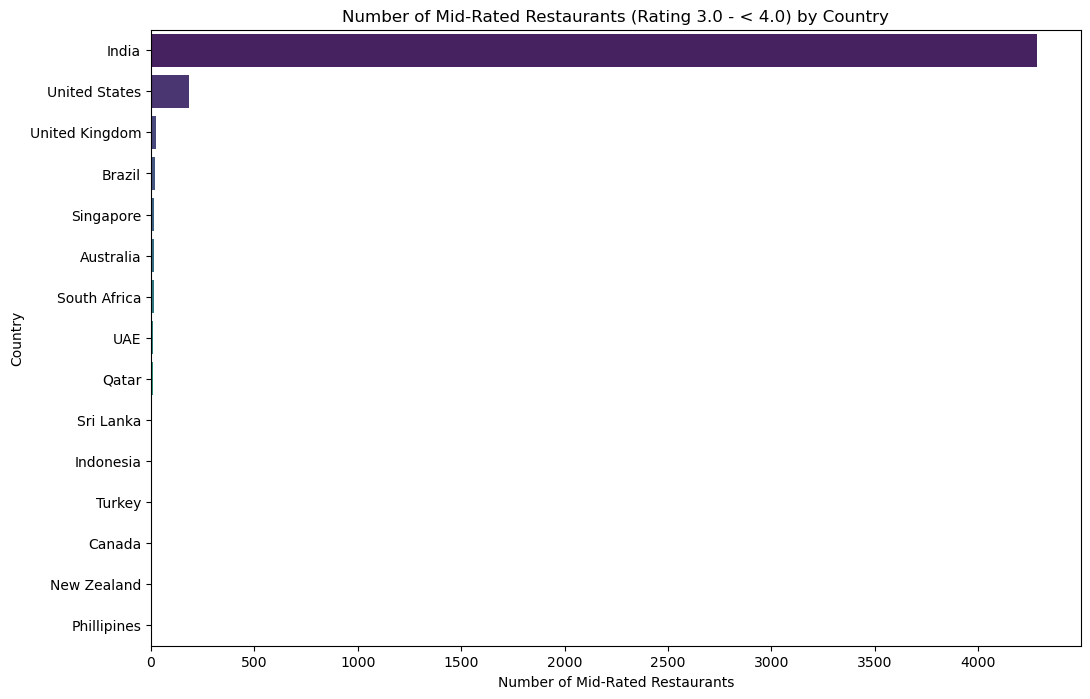

In [164]:
# Plotting the number of mid-rated restaurants in each country

plt.figure(figsize=(12, 8))

sns.barplot(x='Mid Rated Restaurants', y='Country', data=mid_rated_counts, palette='viridis')
plt.title('Number of Mid-Rated Restaurants (Rating 3.0 - < 4.0) by Country')
plt.xlabel('Number of Mid-Rated Restaurants')
plt.ylabel('Country')
plt.show()

#  Aggregate Rating vs. Average Cost for Two

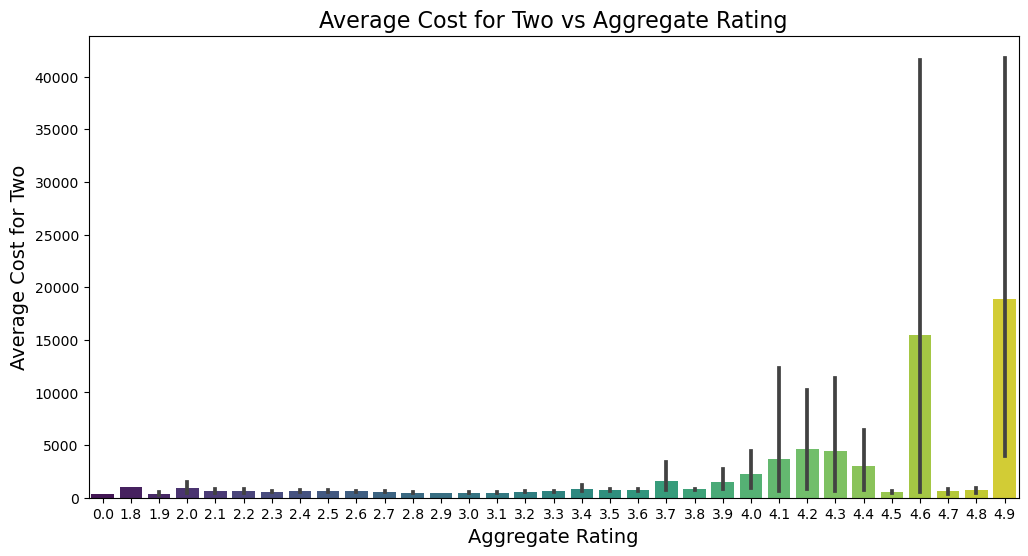

In [165]:
#Plotting to see Aggregate Rating vs. Average Cost for Two

plt.figure(figsize=(12, 6))

sns.barplot(x='Aggregate rating', y='Average Cost for two', data=df, palette='viridis')
plt.title("Average Cost for Two vs Aggregate Rating", fontsize=16)
plt.xlabel("Aggregate Rating", fontsize=14)
plt.ylabel("Average Cost for Two", fontsize=14)
plt.show()

In [166]:
# Group by Aggregate rating, Rating color, and Rating text
grouped_data = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()
print(grouped_data)

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

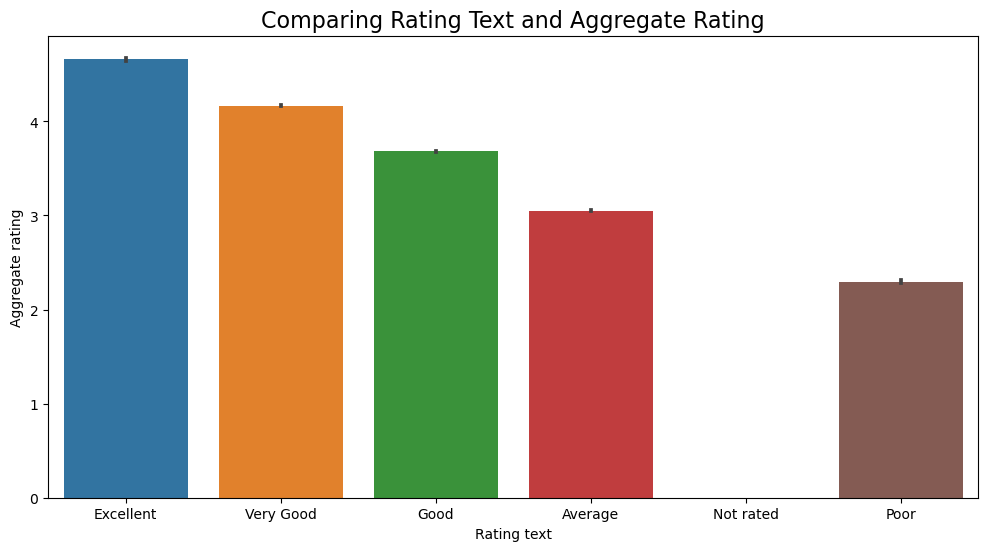

In [167]:
# plot it(Aggregate rating vs Rating text)

plt.figure(figsize=(12, 6))

sns.barplot(x="Rating text", y="Aggregate rating", data=df)
plt.title("Comparing Rating Text and Aggregate Rating", fontsize=16)
plt.show()

# Cost vs. Rating Scatter Plot

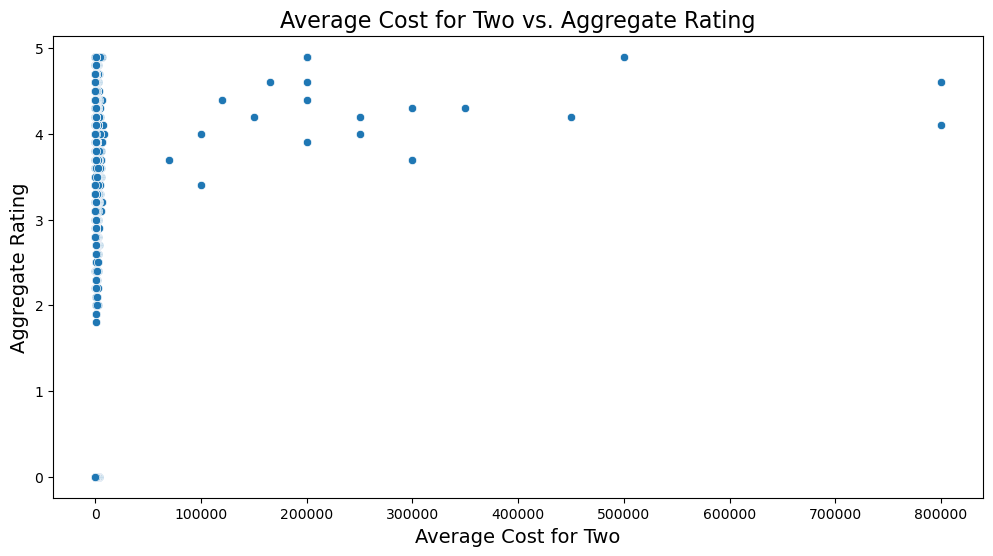

In [168]:

# Scatter plot for Average Cost for Two vs. Aggregate Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.title('Average Cost for Two vs. Aggregate Rating', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.show()


# Rating Distribution by Cuisine

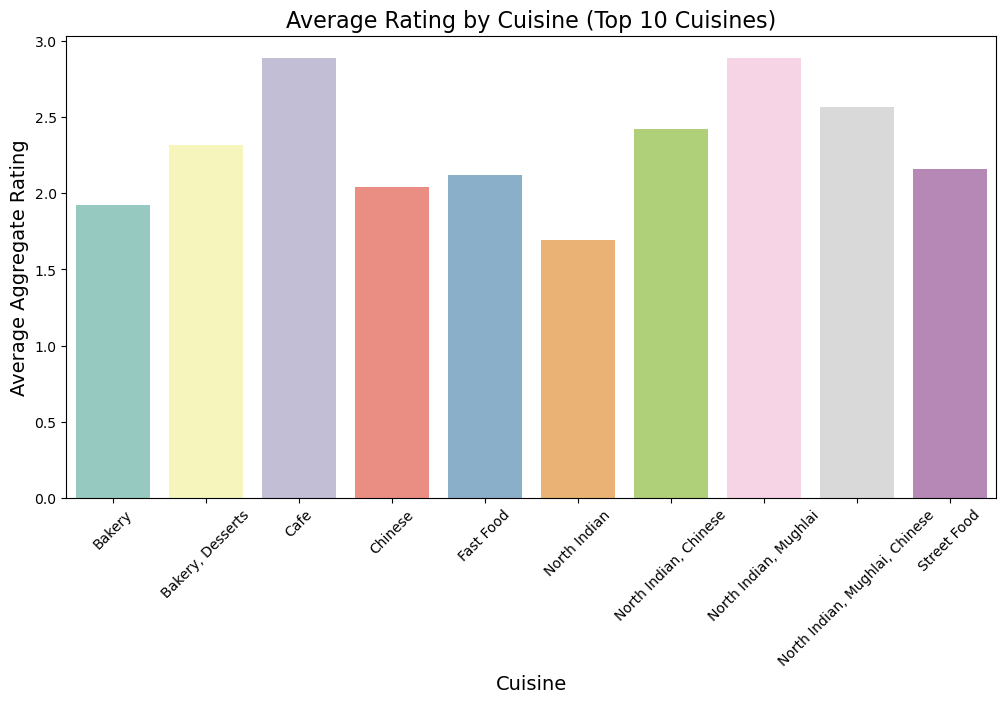

In [169]:
# Ploting the Rating Distribution by Cuisine for top 10 cuisines using barplot

top_10_cuisines = df['Cuisines'].value_counts().head(10).index

df_top_cuisines = df[df['Cuisines'].isin(top_10_cuisines)]
mean_ratings_by_cuisine = df_top_cuisines.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Plot 
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=mean_ratings_by_cuisine, palette='Set3')
plt.title('Average Rating by Cuisine (Top 10 Cuisines)', fontsize=16)
plt.xlabel('Cuisine', fontsize=14)
plt.ylabel('Average Aggregate Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Data processing

In [170]:
# Separating the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Separating the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Displaying the separated columns
print("Numerical Columns:")
print(numerical_cols)

print("\nCategorical Columns:")
print(categorical_cols)


Numerical Columns:
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

Categorical Columns:
Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text', 'Country'],
      dtype='object')


# Visualising skewness

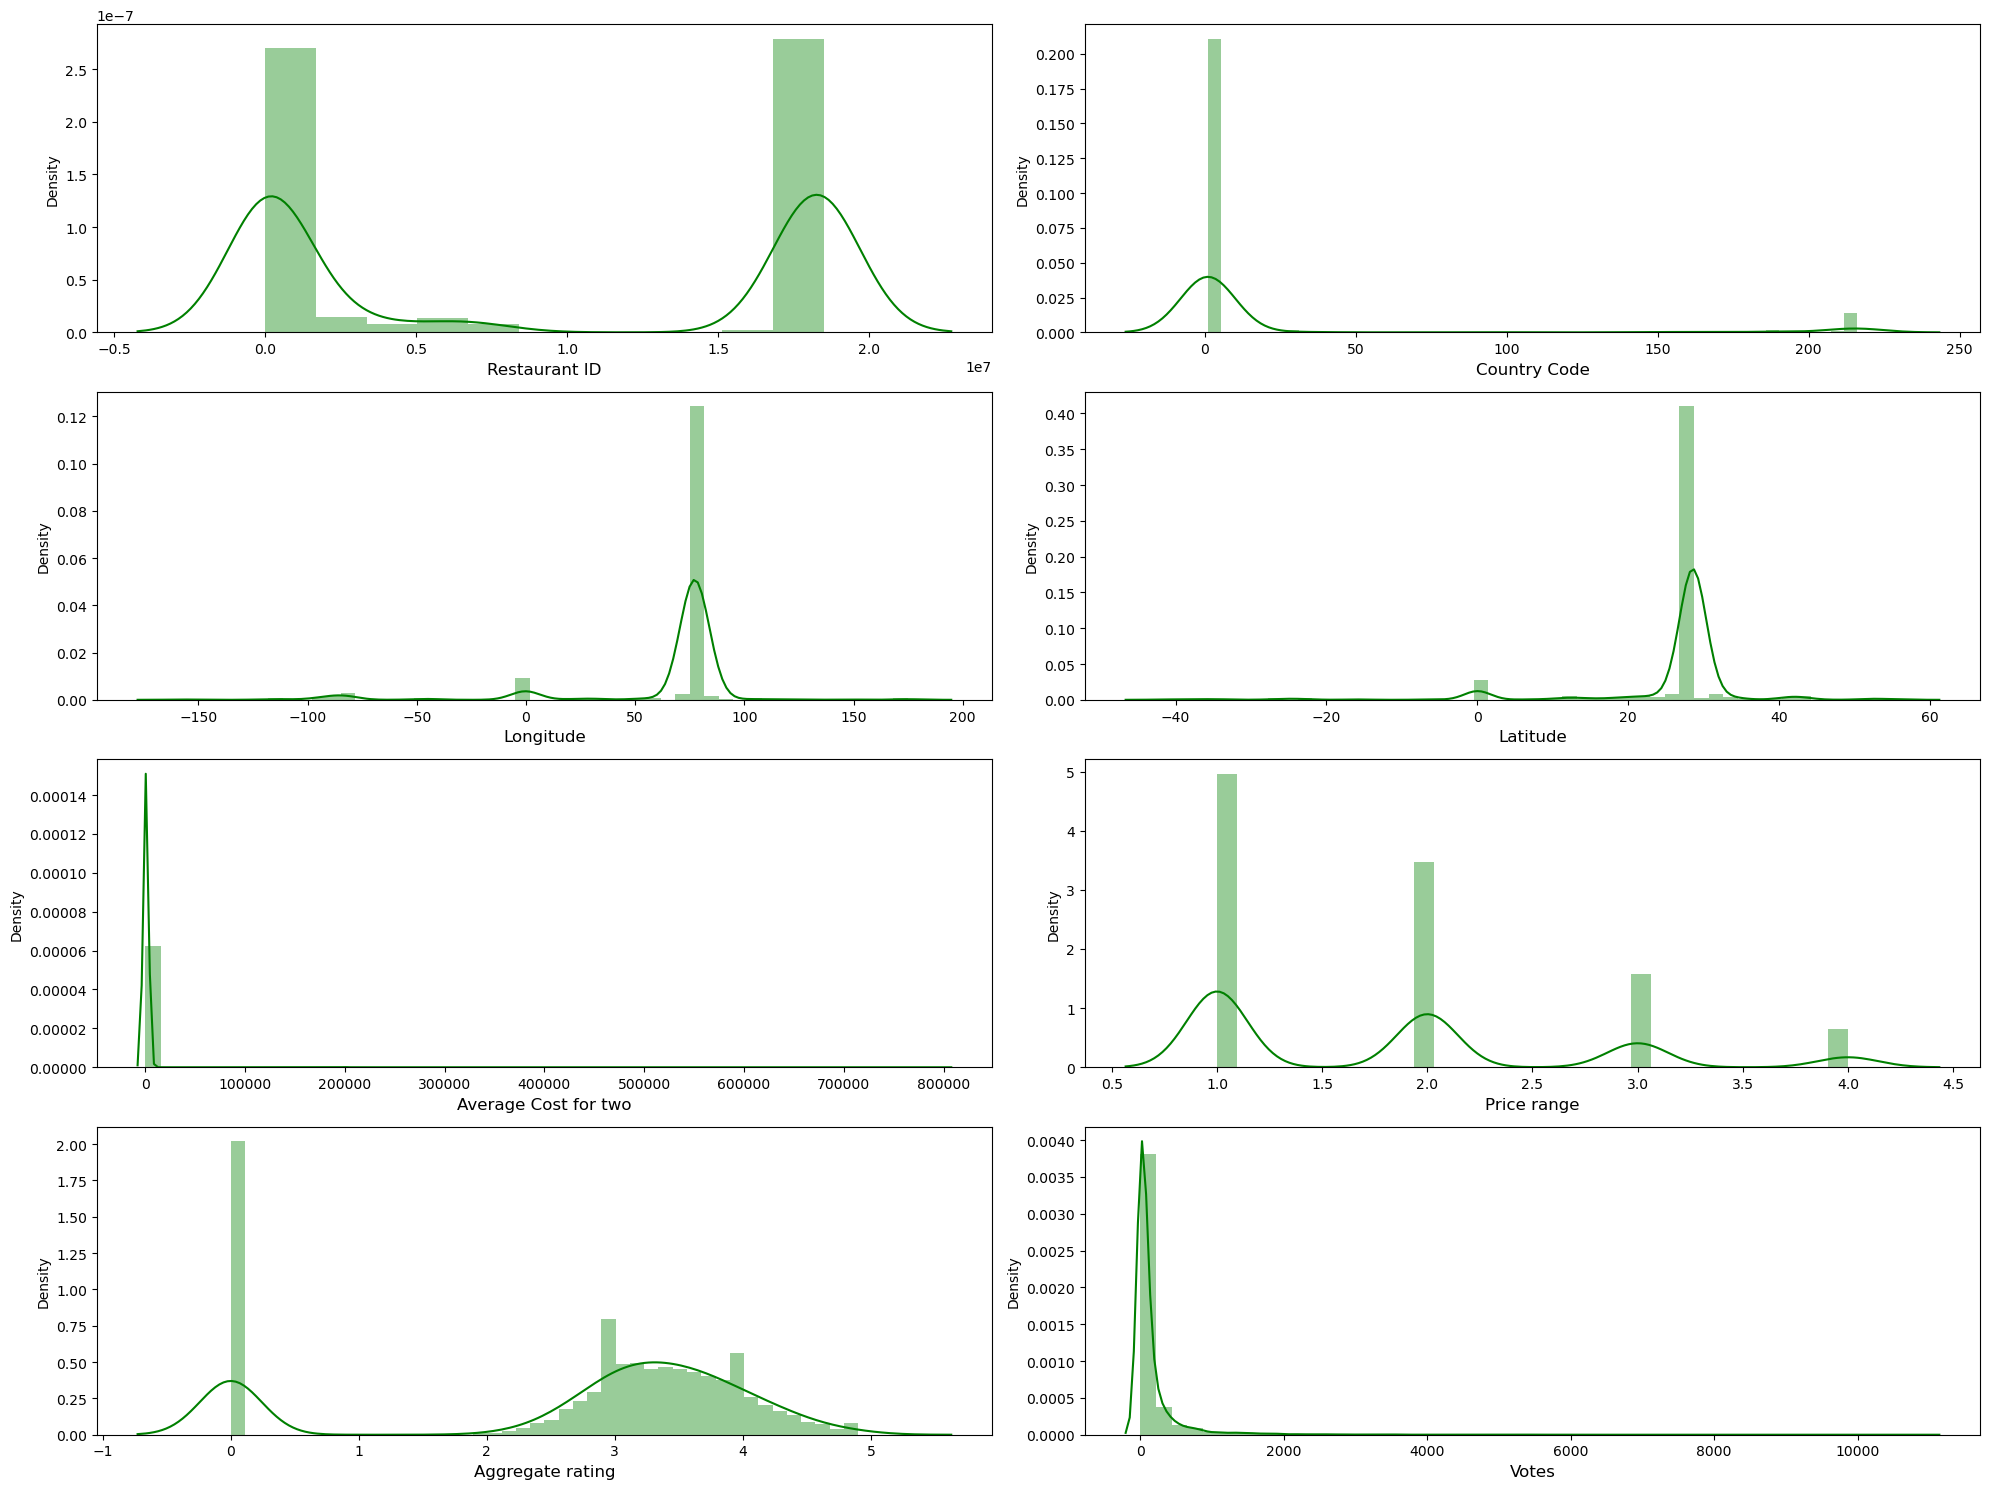

In [171]:
plt.figure(figsize=(20, 15), facecolor="white")
plotnumber = 1  

# Loop through each numerical column
for col in numerical_cols:  
    if plotnumber <= len(numerical_cols):  
        ax = plt.subplot(4, 2, plotnumber) 
        sns.distplot(df[col], color="g")  
        plt.xlabel(col, fontsize=12)  
        plt.yticks(rotation=0, fontsize=10)  
    plotnumber += 1  

plt.tight_layout()  
plt.show()  


# Skewness

In [172]:
df[numerical_cols].skew()

Restaurant ID            0.061570
Country Code             3.043965
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two    35.477915
Price range              0.889618
Aggregate rating        -0.954130
Votes                    8.807637
dtype: float64

In [173]:
from sklearn.preprocessing import PowerTransformer

# Initialization
pt = PowerTransformer(method='yeo-johnson')  

# Applying the Power Transform to numerical columns
df[numerical_cols] = pt.fit_transform(df[numerical_cols])

# Checking the skewness after transformation
print(df[numerical_cols].skew())


Restaurant ID          -0.339181
Country Code            2.780362
Longitude              -0.803832
Latitude               -0.293200
Average Cost for two    0.142365
Price range             0.182963
Aggregate rating       -0.610806
Votes                  -0.004029
dtype: float64


# Checking outliers

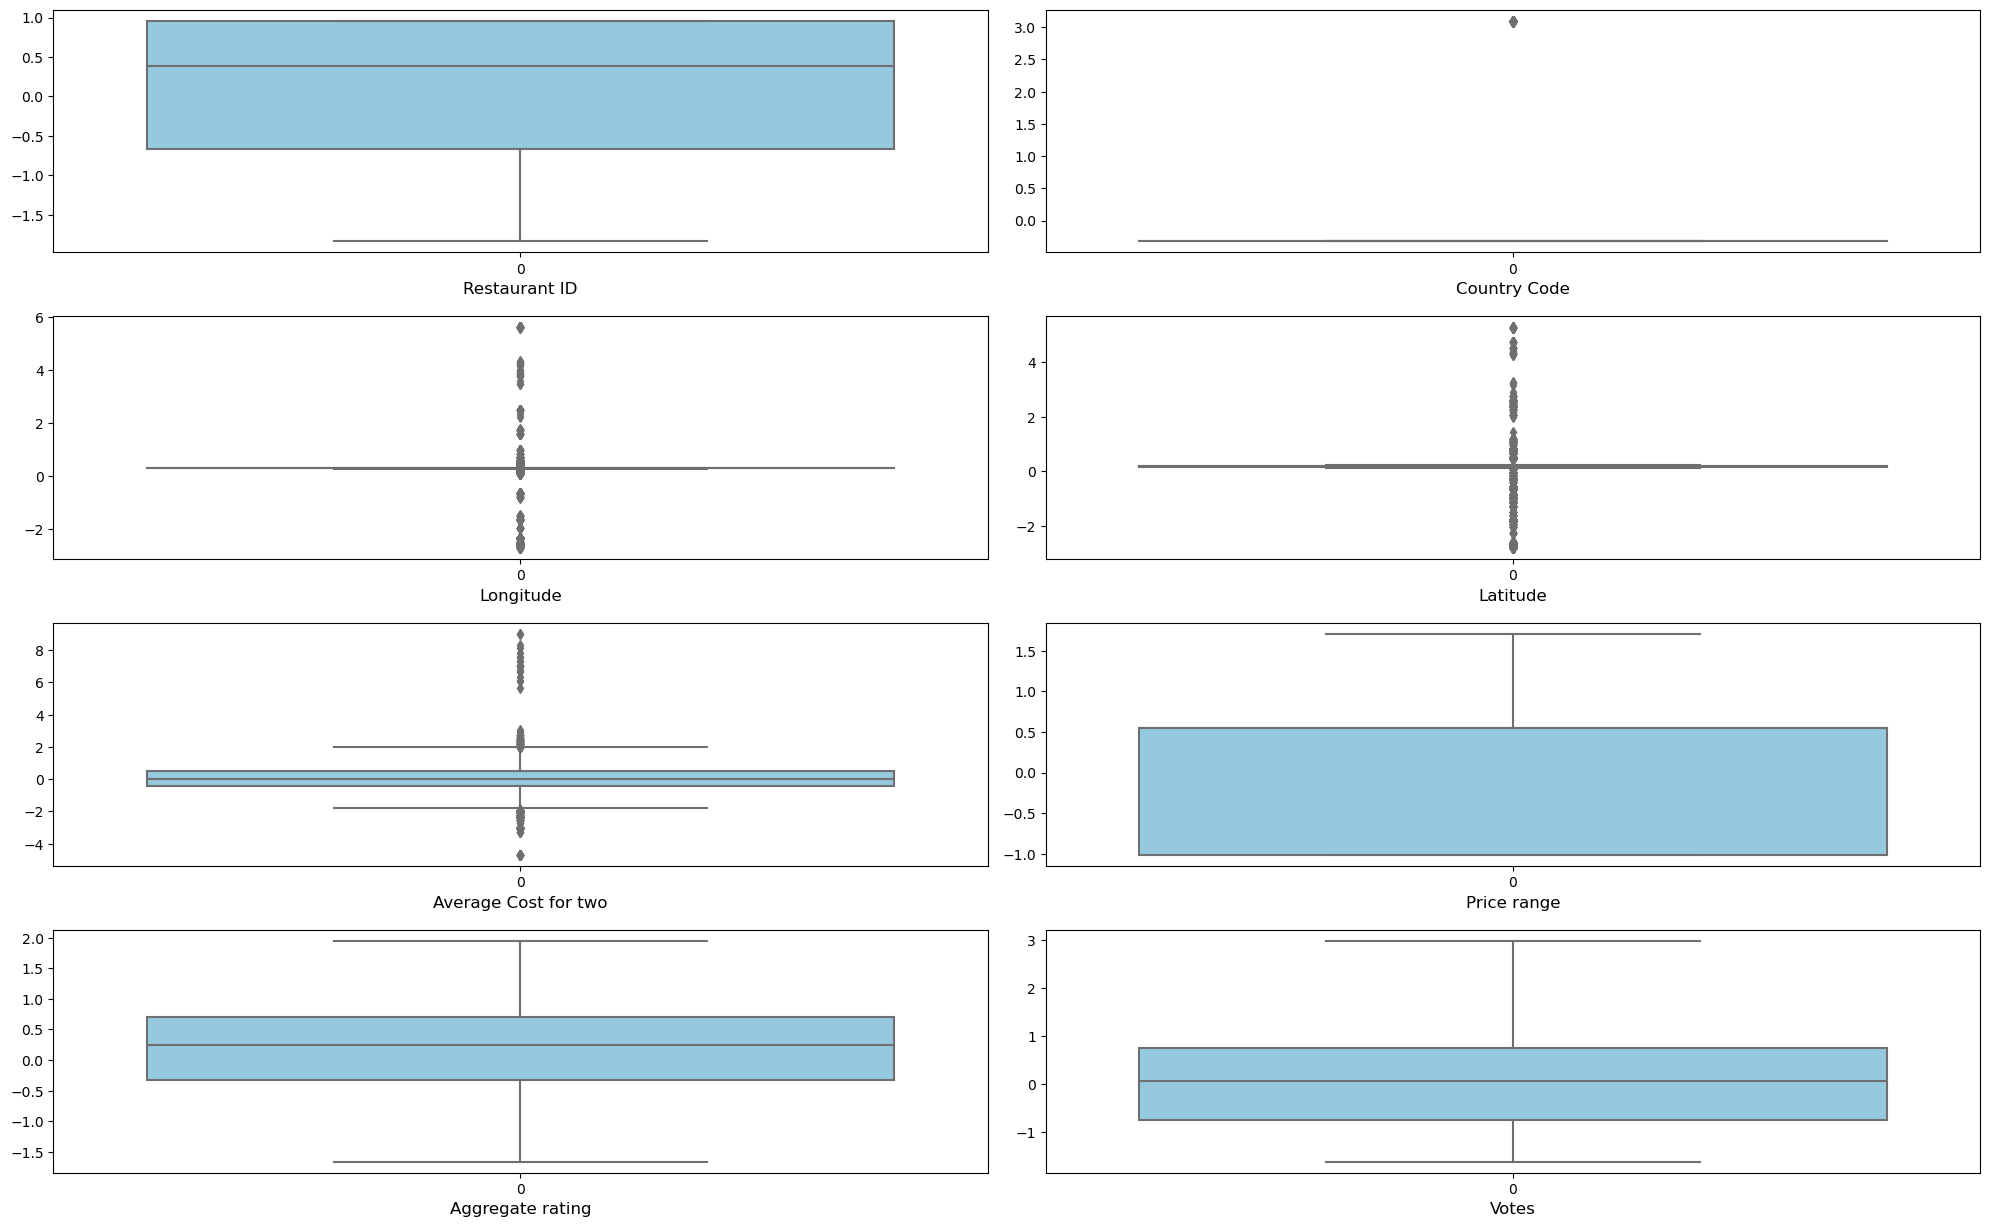

In [174]:
# Plotting boxplots for numerical columns

plt.figure(figsize=(20, 15))
plotnumber = 1

for col in numerical_cols:
    if plotnumber <= len(numerical_cols): 
        ax = plt.subplot(len(numerical_cols)//2 + 1, 2, plotnumber)  
        sns.boxplot(df[col], color='skyblue')
        plt.xlabel(col, fontsize=12)
        plotnumber += 1

plt.tight_layout()  
plt.show()

In [175]:
# Dropping the unnecessary columns
df = df.drop(['Latitude', 'Longitude', 'Country Code', 'Restaurant ID'], axis=1)

# Remove outliers

In [176]:
from scipy import stats

# Setting the threshold 
z_threshold = 3
df_cleaned = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < z_threshold).all(axis=1)]

# Checking the shape 
print("Original dataset shape:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)


Original dataset shape: (9551, 18)
Shape after removing outliers: (9379, 18)


# Label Encoding

In [177]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Applying label encoding to each categorical column
for col in categorical_cols:  
    df[col] = label_encoder.fit_transform(df[col])


In [178]:
df.head(2)

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,3749,73,8685,171,172,920,0.974401,0,1,0,0,0,1.284171,1.833264,0,1,1.191885,6
1,3173,73,6055,593,601,1111,1.060687,0,1,0,0,0,1.284171,1.506121,0,1,1.507786,6


In [179]:
df.columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [180]:
# Drop
columns_to_drop = ['Is delivering now', 'Switch to order menu', 'Rating color']

df.drop(columns=columns_to_drop, inplace=True)

# Correlation matrix

In [181]:
df.corr()

,Restaurant Name,City,Address,Locality,Locality Verbose,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating text,Votes,Country
Restaurant Name,1.000000,-0.001399,0.000763,0.004322,0.004281,0.051679,0.036941,0.009669,0.041173,0.028082,0.061452,0.029327,0.012131,0.039519,0.017560
City,-0.001399,1.000000,-0.019763,0.096444,0.093142,0.026614,0.037831,-0.071996,-0.003762,0.012723,-0.117442,-0.149624,-0.098985,-0.129790,-0.180959
Address,0.000763,-0.019763,1.000000,0.159555,0.160495,0.023944,0.156863,0.069499,0.006428,0.029874,-0.054765,-0.154186,-0.008029,-0.187331,-0.235815
Locality,0.004322,0.096444,0.159555,1.000000,0.999465,0.006993,0.008290,0.023723,-0.065594,-0.030993,-0.117308,-0.184597,-0.036969,-0.205055,-0.118784
Locality Verbose,0.004281,0.093142,0.160495,0.999465,1.000000,0.005960,0.007695,0.022966,-0.065132,-0.031766,-0.115342,-0.183298,-0.035430,-0.203433,-0.116406
Cuisines,0.051679,0.026614,0.023944,0.006993,0.005960,1.000000,0.090798,0.068912,0.050639,-0.016639,-0.000448,-0.094656,-0.079979,-0.065614,-0.127955
Average Cost for two,0.036941,0.037831,0.156863,0.008290,0.007695,0.090798,1.000000,0.203250,0.431701,0.215134,0.490329,0.120736,-0.062074,0.203048,-0.544090
Currency,0.009669,-0.071996,0.069499,0.023723,0.022966,0.068912,0.203250,1.000000,0.000640,0.006991,0.060518,-0.005423,0.014598,-0.011040,-0.105296
Has Table booking,0.041173,-0.003762,0.006428,-0.065594,-0.065132,0.050639,0.431701,0.000640,1.000000,0.101224,0.456966,0.194527,0.044043,0.276031,-0.062076
Has Online delivery,0.028082,0.012723,0.029874,-0.030993,-0.031766,-0.016639,0.215134,0.006991,0.101224,1.000000,0.146494,0.203525,-0.080937,0.284208,-0.140464


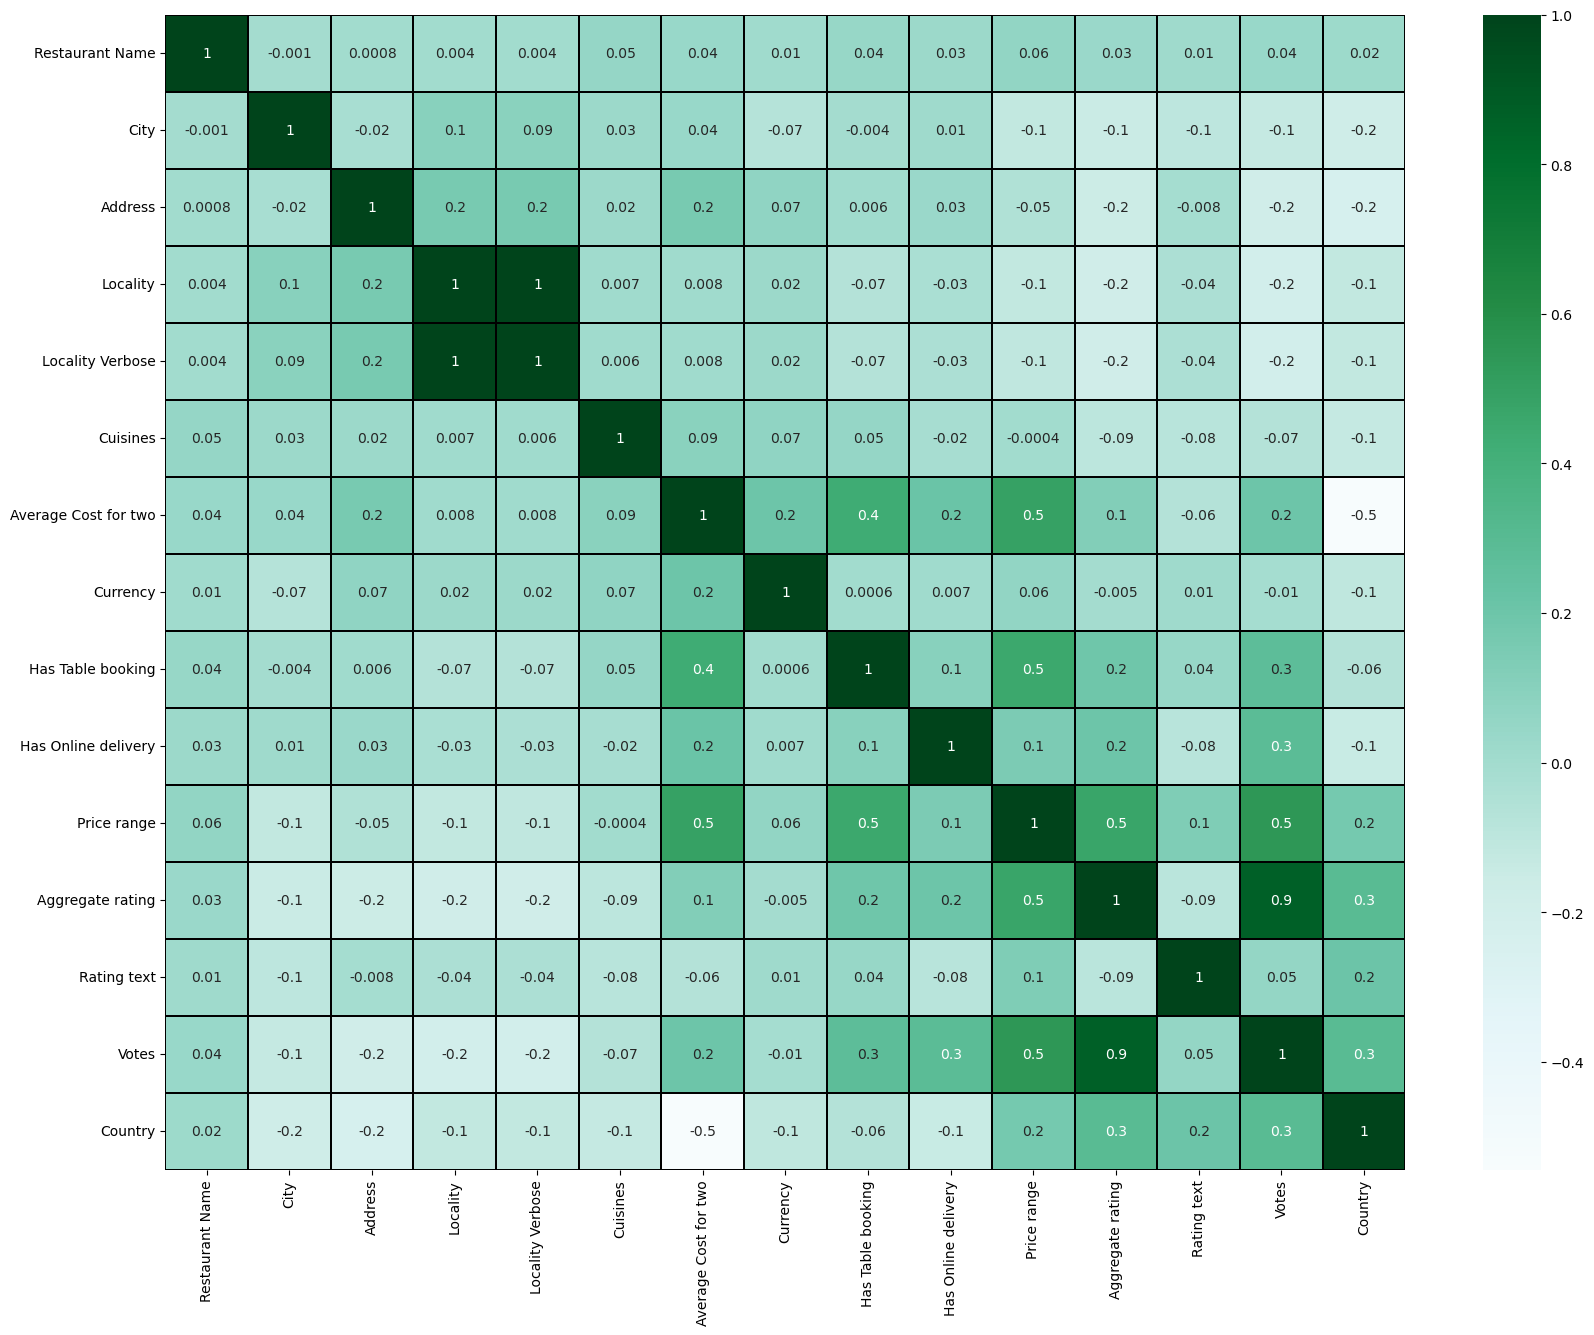

In [182]:
#Plot

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="BuGn")
plt.show()

# Seperate Feature and Label

In [183]:
X = df.drop(['Average Cost for two', 'Price range'], axis=1) 
y_cost = df['Average Cost for two']  
 

# Check shapes
print("X shape:", X.shape)
print("y_cost shape:", y_cost.shape)



X shape: (9551, 13)
y_cost shape: (9551,)


In [184]:
# Initialize
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [185]:
# Split 
X_train_cost, X_test_cost, y_train_cost, y_test_cost = train_test_split(X_scaled, y_cost, test_size=0.2, random_state=42)


# Check 
print("X_train_cost shape:", X_train_cost.shape)
print("y_train_cost shape:", y_train_cost.shape)


X_train_cost shape: (7640, 13)
y_train_cost shape: (7640,)


# VIF Calculation

In [186]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [187]:
vif_df = calculate_vif(X_train_cost) 
print("Initial VIF values:\n", vif_df)

Initial VIF values:
                 Feature         VIF
0       Restaurant Name    1.005886
1                  City    1.081142
2               Address    1.112396
3              Locality  943.044385
4      Locality Verbose  942.157655
5              Cuisines    1.037425
6              Currency    1.030949
7     Has Table booking    1.129070
8   Has Online delivery    1.171624
9      Aggregate rating    4.413613
10          Rating text    1.170688
11                Votes    4.761623
12              Country    1.345786


In [188]:
df = df.drop(['Locality', 'Locality Verbose'], axis=1)

# Model Training

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# 1.Linear regression

In [190]:
# Initialization
linear_regressor = LinearRegression()

# Training
linear_regressor.fit(X_train_cost, y_train_cost)

#  predictions
y_pred_linear_cost = linear_regressor.predict(X_test_cost)

In [191]:
print("Linear Regression for Average Cost for Two:")
print("Mean Squared Error:", mean_squared_error(y_test_cost, y_pred_linear_cost))
print("R2 Score:", r2_score(y_test_cost, y_pred_linear_cost))

Linear Regression for Average Cost for Two:
Mean Squared Error: 0.43132786521208283
R2 Score: 0.5592242574412252


# 2.Decision Tree

In [192]:
# Initialization
tree_regressor = DecisionTreeRegressor(random_state=42)

# Training
tree_regressor.fit(X_train_cost, y_train_cost)

# predictions
y_pred_tree_cost = tree_regressor.predict(X_test_cost)

In [193]:
print("Decision Tree Regressor for Average Cost for Two:")
print("Mean Squared Error:", mean_squared_error(y_test_cost, y_pred_tree_cost))
print("R2 Score:", r2_score(y_test_cost, y_pred_tree_cost))

Decision Tree Regressor for Average Cost for Two:
Mean Squared Error: 0.434605732772107
R2 Score: 0.5558745909246217


# 3.Random Forest

In [194]:
# Initialization
forest_regressor = RandomForestRegressor(random_state=42)

# Training
forest_regressor.fit(X_train_cost, y_train_cost)

# predictions
y_pred_forest_cost = forest_regressor.predict(X_test_cost)

In [195]:
print("Random Forest Regressor for Average Cost for Two:")
print("Mean Squared Error:", mean_squared_error(y_test_cost, y_pred_forest_cost))
print("R2 Score:", r2_score(y_test_cost, y_pred_forest_cost))

Random Forest Regressor for Average Cost for Two:
Mean Squared Error: 0.18964597336107486
R2 Score: 0.8061999896751216


# Hyperparameter tunning of the best model since other have acc very far from 1

In [196]:
rf = RandomForestRegressor(random_state=42)

In [197]:
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [198]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

In [199]:
grid_search.fit(X_train_cost, y_train_cost)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [200]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [201]:
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [202]:
y_pred_cost = best_model.predict(X_test_cost)

mse_cost = mean_squared_error(y_test_cost, y_pred_cost)
r2_cost = r2_score(y_test_cost, y_pred_cost)

In [203]:
print("Mean Squared Error:", mse_cost)
print("R² Score:", r2_cost)

Mean Squared Error: 0.20475089893066992
R² Score: 0.7907642033018958


# cross validating

In [204]:
from sklearn.model_selection import cross_val_score

# cross-validation
cv_scores = cross_val_score(best_model, X_scaled, y_cost, cv=5, scoring='neg_mean_squared_error')

cv_scores = np.abs(cv_scores)

print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE:", cv_scores.mean())

Cross-Validation MSE Scores: [2.60179808 0.24909881 0.1977432  0.21076427 1.02491606]
Mean Cross-Validation MSE: 0.8568640821632176


In [223]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_classifier, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

# ---------------------------------------------------------------------------------------